In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

!pip install imblearn  
from imblearn.over_sampling import SMOTE

! pip install scikit-plot


In [34]:
import scikitplot as skplt

In [2]:
df = pd.read_csv('C:/Users/vishal/Downloads/loan_final313.csv')

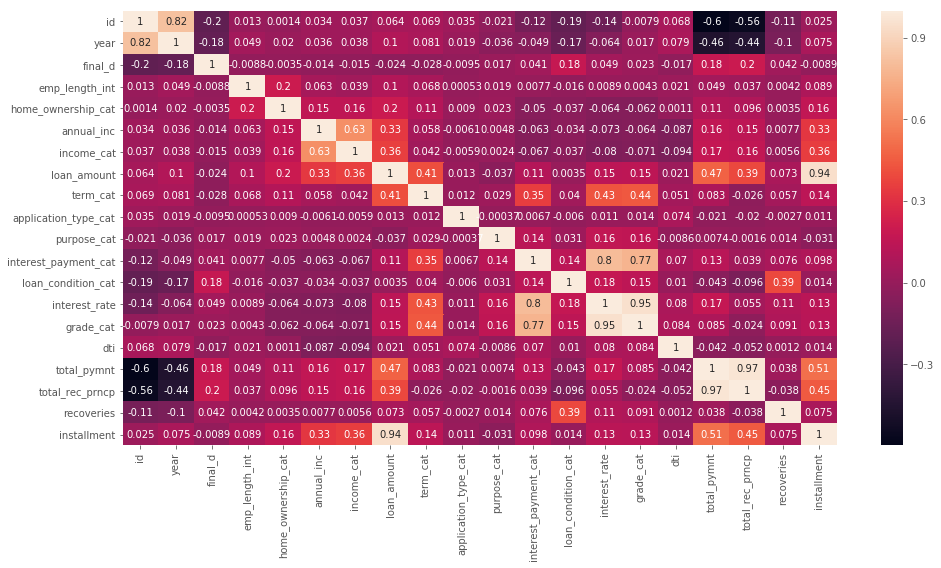

In [45]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [3]:
def defaulted(x):
    if x == 'Good Loan':
        return 0
    else:
        return 1

In [4]:
df['default'] = df['loan_condition'].apply(lambda x: defaulted(x))

In [6]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region', 'default'],
      dtype='object')

In [5]:
df.drop('id', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('issue_d', axis=1, inplace=True)





In [6]:
scaler = MinMaxScaler()
df['emp_length_int'] = scaler.fit_transform(df['emp_length_int'].values.reshape(-1,1))

In [7]:
scaler = MinMaxScaler()
df['final_d'] = scaler.fit_transform(df['final_d'].values.reshape(-1,1))

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'])],axis=1).drop(['home_ownership', 'home_ownership_cat'],axis=1)

In [8]:
df.drop(['OTHER', 'NONE', 'ANY'],axis=1,inplace=True)

KeyError: "['OTHER' 'NONE' 'ANY'] not found in axis"

In [71]:
df = pd.concat([df, pd.get_dummies(df['income_category'])],axis=1).drop(['income_category', 'income_cat'],axis=1)

In [10]:
outliers = df[df['annual_inc'] > df['annual_inc'].quantile(0.99)].index

In [11]:
df.loc[outliers,'annual_inc'] = df['annual_inc'].quantile(0.99)

In [12]:
scaler = MinMaxScaler()
df['annual_inc'] = scaler.fit_transform(df['annual_inc'].values.reshape(-1,1))

In [13]:
scaler = MinMaxScaler()
df['loan_amount'] = scaler.fit_transform(df['loan_amount'].values.reshape(-1,1))

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [76]:
df = df.drop(['term'],axis=1)


In [77]:
df.drop(['application_type','application_type_cat'],axis=1,inplace=True)

In [78]:
df = df.drop(['purpose'],axis=1)

In [34]:
df.drop(['car', 'small_business', 'other', 'wedding', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'],axis=1, inplace=True)

KeyError: "['car' 'small_business' 'other' 'wedding' 'home_improvement'\n 'major_purchase' 'medical' 'moving' 'vacation' 'house' 'renewable_energy'\n 'educational'] not found in axis"

In [36]:
df.columns

Index(['emp_length_int', 'annual_inc', 'loan_amount', 'term_cat',
       'purpose_cat', 'interest_payments', 'interest_payment_cat',
       'loan_condition', 'loan_condition_cat', 'interest_rate', 'grade',
       'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment', 'region', 'default', 'MORTGAGE', 'OWN', 'RENT', 'High',
       'Low', 'Medium'],
      dtype='object')

In [51]:
df.drop(['loan_condition', 'loan_condition_cat'],axis=1,inplace=True)

# class imbalance

In [16]:
scaler = MinMaxScaler()
df['interest_rate'] = scaler.fit_transform(df['interest_rate'].values.reshape(-1,1))

In [83]:
df.drop(['grade'],axis=1,inplace=True)

In [17]:
outliers = df[df['dti'] > df['dti'].quantile(.99)].index
df.loc[outliers,'dti'] = df['dti'].quantile(.99)

In [18]:
scaler = MinMaxScaler()
df['dti'] = scaler.fit_transform(df['dti'].values.reshape(-1,1))

In [86]:
df=df.drop('total_pymnt', axis=1, inplace=True)

In [58]:
df=df.drop('total_rec_prncp', axis=1, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [87]:
df=df.drop('region', axis=1, inplace=True)


AttributeError: 'NoneType' object has no attribute 'drop'

In [61]:
df[df.default==0].shape

AttributeError: 'NoneType' object has no attribute 'default'

In [57]:
df[df.default==1].shape

(67429, 28)

In [61]:
import seaborn as sns
sns.lmplot(df., 'Amount', dataset, hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

SyntaxError: invalid syntax (<ipython-input-61-01cc5c5dc12d>, line 1)

In [31]:
scaler = MinMaxScaler()
df['recoveries'] = scaler.fit_transform(df['recoveries'].values.reshape(-1,1))

TypeError: 'NoneType' object is not subscriptable

In [56]:
df.columns


Index(['emp_length_int', 'annual_inc', 'loan_amount', 'term_cat',
       'purpose_cat', 'interest_payment_cat', 'interest_rate', 'grade_cat',
       'dti', 'recoveries', 'installment', 'region', 'default', 'MORTGAGE',
       'OWN', 'RENT', 'High', 'Low', 'Medium'],
      dtype='object')

In [53]:
# Separate majority and minority classes
df_majority = df[df.default==0]
df_minority = df[df.default==1]
 


In [83]:
df_majority.count()

emp_length_int          819950
annual_inc              819950
loan_amount             819950
term                    819950
term_cat                819950
purpose                 819950
purpose_cat             819950
interest_payments       819950
interest_payment_cat    819950
interest_rate           819950
grade                   819950
grade_cat               819950
dti                     819950
recoveries              819950
installment             819950
default                 819950
MORTGAGE                819950
OWN                     819950
RENT                    819950
High                    819950
Low                     819950
Medium                  819950
dtype: int64

In [84]:
df_minority.count()

emp_length_int          67429
annual_inc              67429
loan_amount             67429
term                    67429
term_cat                67429
purpose                 67429
purpose_cat             67429
interest_payments       67429
interest_payment_cat    67429
interest_rate           67429
grade                   67429
grade_cat               67429
dti                     67429
recoveries              67429
installment             67429
default                 67429
MORTGAGE                67429
OWN                     67429
RENT                    67429
High                    67429
Low                     67429
Medium                  67429
dtype: int64

In [56]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=900000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.default.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    900000
0    819950
Name: default, dtype: int64

In [146]:
df.columns

Index(['emp_length_int', 'annual_inc', 'loan_amount', 'term_cat',
       'purpose_cat', 'interest_payment_cat', 'interest_rate', 'grade_cat',
       'dti', 'recoveries', 'installment', 'region', 'default', 'MORTGAGE',
       'OWN', 'RENT', 'High', 'Low', 'Medium'],
      dtype='object')

In [45]:
from imblearn.over_sampling import SMOTE


In [20]:
y=df.default
X = df[['term_cat','interest_payment_cat',
        'grade_cat',
        'recoveries', 'final_d'  ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [66]:
X_train.shape, y_train.shape

((709903, 5), (709903,))

In [21]:
ratios = np.array([0.2,0.4,0.6,0.8,1.0])
rf_acc_os = []
ada_acc_os = []
rf_recall_os = []
ada_recall_os = []
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
for j in ratios:
    sm = SMOTE(random_state=101, ratio = j)
    X_train_os, y_train_os = sm.fit_sample(X_train, y_train)
    
    X_train_os[:,5:] = np.round(X_train_os[:,5:])

In [71]:
X_train_os.shape, y_train_os.shape

((1312234, 5), (1312234,))

# random forrest

In [85]:
rf_base = RandomForestClassifier(n_estimators=100)

In [86]:
rf_base.fit(X_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
rf_base_pred = rf_base.predict(X_test)
print(confusion_matrix(y_test, rf_base_pred))
print('\n')

[[136536  27297]
 [  2779  10864]]




In [64]:
print(confusion_matrix(y_test, rf_base_pred))
print('\n')

[[133703  30130]
 [  5522   8121]]




Accuracy: 0.8305348328788118
Precision: 0.2846885563795498
Recall: 0.7963057978450487


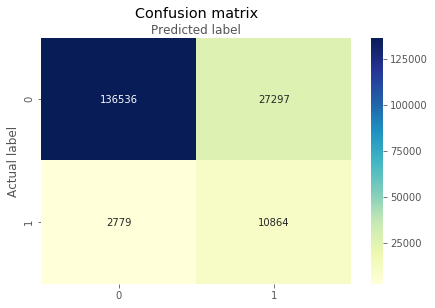

In [68]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, rf_base_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, rf_base_pred ))
print("Precision:",metrics.precision_score(y_test,  rf_base_pred))
print("Recall:",metrics.recall_score(y_test,  rf_base_pred))


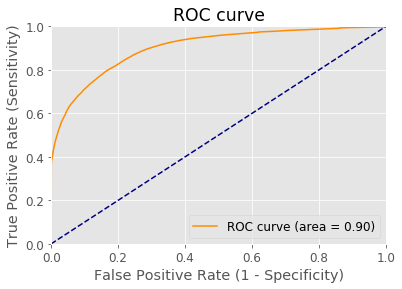

0.9020971352561405


In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
rft=rf_base.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, rft)
auc = metrics.roc_auc_score(y_test, dftrees)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        



print(auc)


# decision tree

In [80]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train_os, y_train_os) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.8302080281277469
Accuracy: 0.8302080281277469
Precision: 0.2843355216697617
Recall: 0.7968188814776809
f1score: 0.4191148122445832
[0.82140462 0.82500152 0.82437664 0.82455191 0.82427757 0.82595409
 0.82415564 0.82456448 0.82208776 0.82569996]


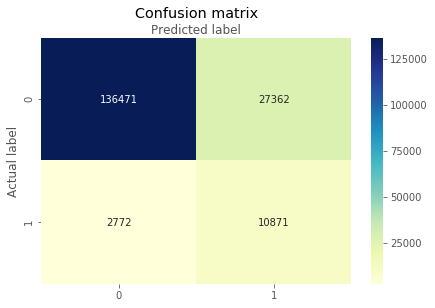

In [87]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tree=classifier.predict(X_test)
print(accuracy_score(y_test,tree))
cnf_matrix = metrics.confusion_matrix(y_test, tree)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test,tree ))
print("Precision:",metrics.precision_score(y_test, tree))
print("Recall:",metrics.recall_score(y_test, tree))
print("f1score:",metrics.f1_score(y_test, tree))

print(cross_val_score(classifier, X_train_os, y_train_os, scoring='accuracy', cv = 10))

In [76]:
df.columns

Index(['emp_length_int', 'annual_inc', 'loan_amount', 'term_cat',
       'purpose_cat', 'interest_payment_cat', 'interest_rate', 'grade_cat',
       'dti', 'recoveries', 'installment', 'region', 'default', 'MORTGAGE',
       'OWN', 'RENT', 'High', 'Low', 'Medium'],
      dtype='object')

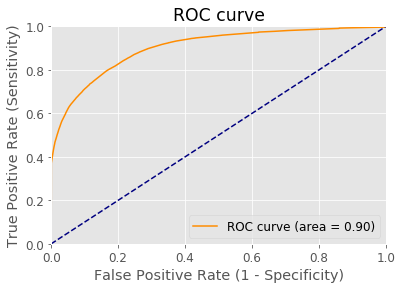

0.9020971352561405


In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
dftrees=classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, dftrees)
auc = metrics.roc_auc_score(y_test, dftrees)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

print(auc)

# Gauss NB

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
gnb = GaussianNB()
gnb.fit (X_train_os,y_train_os)
y2_GNB_model = gnb.predict(X_test)
print("GaussianNB Accuracy :", accuracy_score(y_test, y2_GNB_model))

cnf_matrix = metrics.confusion_matrix(y_test, y2_GNB_model)
cnf_matrix

print( np.unique( y2_GNB_model) )


print("Accuracy:",metrics.accuracy_score(y_test,y2_GNB_model ))
print("Precision:",metrics.precision_score(y_test, y2_GNB_model))
print("Recall:",metrics.recall_score(y_test, y2_GNB_model))
print("f1score:",metrics.f1_score(y_test, y2_GNB_model))



GaussianNB Accuracy : 0.9512384773152426
[0 1]
Accuracy: 0.9512384773152426
Precision: 1.0
Recall: 0.3656820347430917
f1score: 0.5355302705023616


In [53]:
cnf_matrix = metrics.confusion_matrix(y_test, y2_GNB_model)
cnf_matrix

array([[163833,      0],
       [  8656,   4987]], dtype=int64)

[0.68397549 0.68100347 0.68339633 0.68300006 0.68344967 0.6838307
 0.68195604 0.68274375 0.68246178 0.68406974]


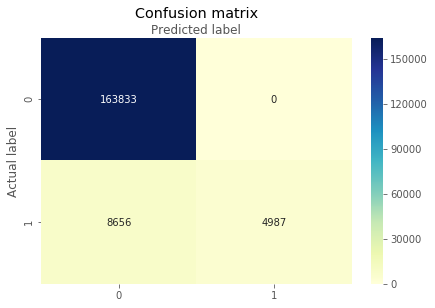

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(cross_val_score(gnb, X_train_os, y_train_os, scoring='accuracy', cv = 10))

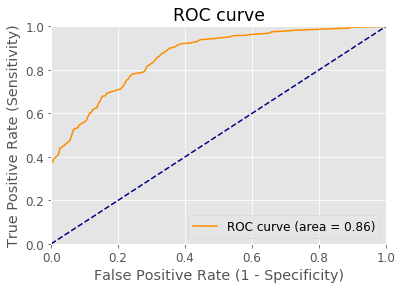

0.8621738231512297


In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
dftrees=gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, dftrees)
auc = metrics.roc_auc_score(y_test, dftrees)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

print(auc)

# logistic regression

In [28]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_os,y_train_os)

#
y_pred=logreg.predict(X_test)

print( np.unique( y_pred) )

from sklearn import metrics


print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1score:",metrics.f1_score(y_test, y_pred))

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 1]
Accuracy : 0.7923493880862764
Precision: 0.22786323984616827
Recall: 0.7122333797551859
f1score: 0.3452662248831879


In [29]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[130906,  32927],
       [  3926,   9717]], dtype=int64)

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[0.7573767  0.756226   0.75573066 0.75864171 0.75696519 0.75608883
 0.75467902 0.75530018 0.75506394 0.75586411]


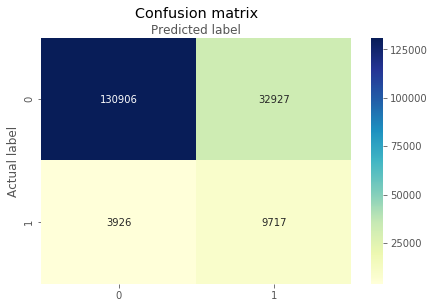

In [31]:
from sklearn.model_selection import cross_val_score
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(cross_val_score(logreg, X_train_os, y_train_os, scoring='accuracy', cv = 10))

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7923493880862764
Precision: 0.22786323984616827
Recall: 0.7122333797551859


In [44]:
X_test.shape

(177476, 5)

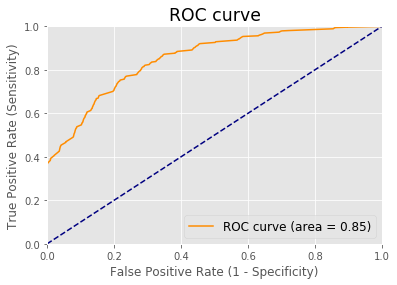

0.8523999564527789


In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
dftrees=logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, dftrees)
auc = metrics.roc_auc_score(y_test, dftrees)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

print(auc)

df

In [89]:
df.columns

Index(['emp_length_int', 'annual_inc', 'loan_amount', 'interest_rate', 'dti',
       'default', 'MORTGAGE', 'OWN', 'RENT', 'High', 'Low', 'Medium', 'term_1',
       'term_2', 'credit_card', 'debt_consolidation', 'int_Low'],
      dtype='object')

# feature extraction because overfitting can be of some features selected 

# adaboost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train_os,y_train_os)

clf_pred_ = clf.predict(X_test)

Accuracy: 0.8008688498726588
Precision: 0.25533354381850165
Recall: 0.8298761269515502


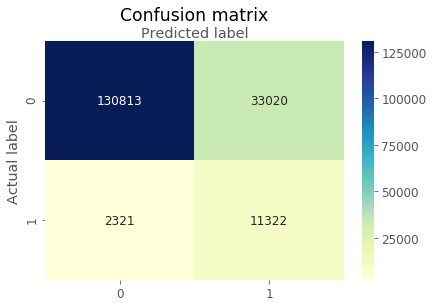

In [40]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, clf_pred_)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, clf_pred_ ))
print("Precision:",metrics.precision_score(y_test, clf_pred_))
print("Recall:",metrics.recall_score(y_test,  clf_pred_))




In [43]:
X_test.shape

(177476, 5)

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
dftrees=AdaBoostClassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, dftrees)
auc = metrics.roc_auc_score(y_test, dftrees)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

print(auc)


TypeError: predict_proba() missing 1 required positional argument: 'X'

# undersampling  decision tree

0.8268554621469946
Accuracy: 0.8268554621469946
Precision: 0.28064499563498174
Recall: 0.8011434435241516


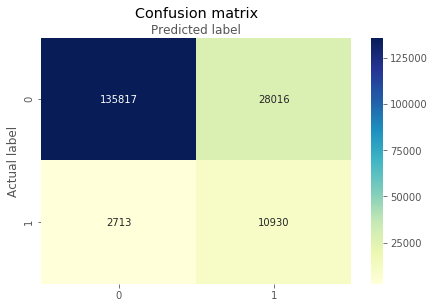

In [60]:
ratios = np.array([0.2,0.4,0.6,0.8,1.0])
rf_acc_us = []
ada_acc_us = []
rf_recall_us = []
ada_recall_us = []
default_count = y_train.value_counts()[1]
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
bad_indices = y_train[y_train==1].index
for i in ratios:
    majority_count = int(np.floor(default_count / i))
    good_indices = np.random.choice(y_train[y_train==0].index,size=majority_count)
    indices = np.concatenate((bad_indices,good_indices))
    X_train_us = X_train.iloc[indices]
    y_train_us = y_train.iloc[indices]
    
    
    
    
    from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train_us, y_train_us) 



from sklearn import metrics
tree=classifier.predict(X_test)
print(accuracy_score(y_test,tree))
cnf_matrix = metrics.confusion_matrix(y_test, tree)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test,tree ))
print("Precision:",metrics.precision_score(y_test, tree))
print("Recall:",metrics.recall_score(y_test, tree))






0.8150700218603466


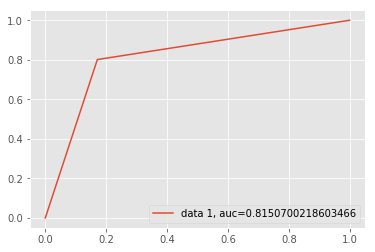

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, tree)
auc = metrics.roc_auc_score(y_test, tree)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# under logistic

In [62]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_us,y_train_us)

#
y_pred=logreg.predict(X_test)

print( np.unique( y_pred) )

from sklearn import metrics


print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1score:",metrics.f1_score(y_test, y_pred))

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 1]
Accuracy : 0.7441794946922401
Precision: 0.19179783785882032
Recall: 0.7243274939529429
f1score: 0.3032869901482368


C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[0.75390935 0.75212614 0.7513336  0.75431324 0.75303298 0.75299488
 0.75144791 0.75136791 0.75115453 0.75225191]


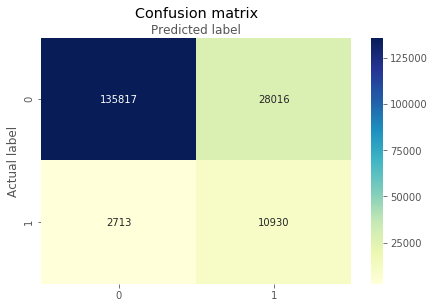

In [63]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(cross_val_score(logreg, X_train_os, y_train_os, scoring='accuracy', cv = 10))

0.7350800703057153
0.47016014061143063


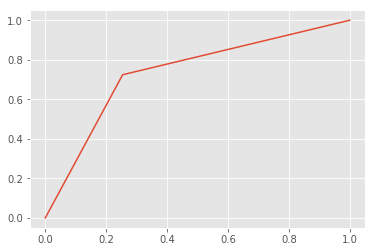

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print( roc_auc_score(y_test,y_pred) )
gini=2*auc
gini= gini-1
print(gini)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.show()

# under randomforest

[[135497  28336]
 [  2675  10968]]


Accuracy: 0.8252665149090581
Precision: 0.2790555668634236
Recall: 0.803928754672726
[0.81781    0.81957613 0.81799591 0.81604387 0.81743819 0.81427775
 0.82307549 0.81433618 0.82130904 0.82019338]


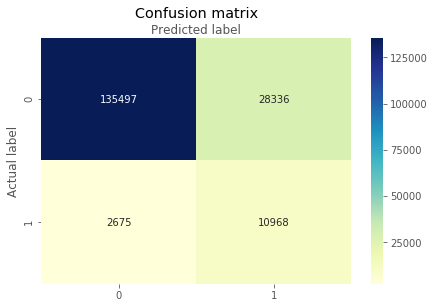

In [73]:
rf_base = RandomForestClassifier(n_estimators=100)

rf_base.fit(X_train_us,y_train_us)

rf_base_pred = rf_base.predict(X_test)
print(confusion_matrix(y_test, rf_base_pred))
print('\n')


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, rf_base_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, rf_base_pred ))
print("Precision:",metrics.precision_score(y_test,  rf_base_pred))
print("Recall:",metrics.recall_score(y_test,  rf_base_pred))


print(cross_val_score(rf_base, X_train_us, y_train_us, scoring='accuracy', cv = 10))

0.8154860732095998


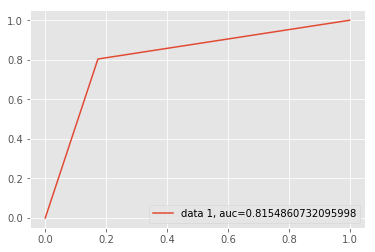

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test,  rf_base_pred)
auc = metrics.roc_auc_score(y_test,  rf_base_pred)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# gauss under

Accuracy: 0.9512272081858956
Precision: 1.0
Recall: 0.3655354394194825
f1score: 0.5353730542136339
[0.68237591 0.68386317 0.68832497 0.67958728 0.67689162 0.68851088
 0.67701748 0.68519896 0.68631462 0.68194496]


Text(0.5, 257.44, 'Predicted label')

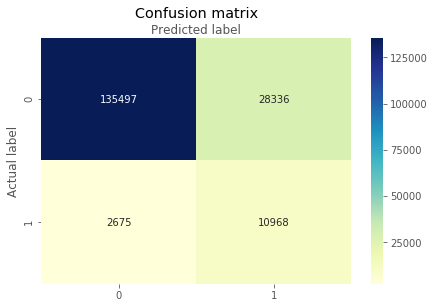

In [78]:
gnb = GaussianNB()
gnb.fit (X_train_us,y_train_us)
y2_GNB_model = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y2_GNB_model ))
print("Precision:",metrics.precision_score(y_test, y2_GNB_model))
print("Recall:",metrics.recall_score(y_test, y2_GNB_model))
print("f1score:",metrics.f1_score(y_test, y2_GNB_model))

print(cross_val_score(gnb, X_train_us, y_train_us, scoring='accuracy', cv = 10))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


0.6827677197097413


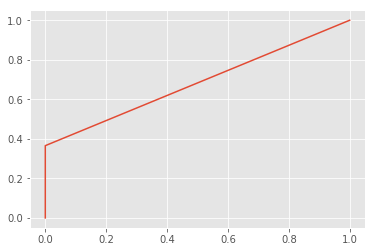

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test,y2_GNB_model)
auc = metrics.roc_auc_score(y_test, y2_GNB_model)
print( roc_auc_score(y_test,y2_GNB_model ) )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.show()

# export clean file .csv


In [58]:
df.to_csv('C:/Users/vishal/Downloads/loanclean.csv')

In [56]:
df = df.drop(['region'], axis=1)

In [ ]:
print(cross_val_score(rf_class, data_input, data_output, scoring='accuracy', cv = 10))



# gradient boosting

0.8127985683334964


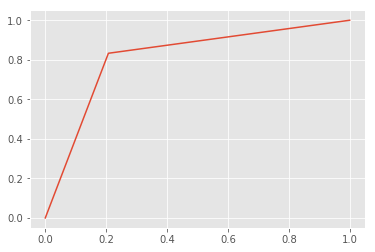

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
dftrees=GradientBoostingClassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, dftrees)
auc = metrics.roc_auc_score(y_test, dftrees)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

print(auc)